This is a tutorial on how to compare machine learning methods with the python library scikit-learn. We'll be using the Indian Liver Disease dataset (found here https://www.kaggle.com/uciml/indian-liver-patient-records).

From the dataset page:

"This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records."

I've used Jason Brownlee's article (https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/) from 2016 as the basis for this article...I wanted to expand a bit on what he did as well as use a different dataset.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [36]:
#read in the data
data = pd.read_csv('indian_liver_patient.csv')

In [37]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


We'll use all columns except Gender for this tutorial. We could use gender by converting the gender to a numeric value (e.g., 0 for Male, 1 for Female) but for the purproses of this post, we'll just skip this column. 

In [39]:
data_to_use = data
del data_to_use['Gender']
data_to_use.dropna(inplace=True)

In [40]:
data_to_use.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


The 'Dataset' column is the value we are trying to predict...whether the user has liver disease or not so we'll that as our "Y" and the other columns for our "X" array.

In [41]:
values = data_to_use.values

Y = values[:,9]
X = values[:,0:9]

Before we run our machine learning models, we need to set a random number to use to seed them. This can be any random number that you'd like it to be. Some people like to use a random number generator but for the purposes of this, I'll just set it to 12 (it could just as easily be 1 or 3 or 1023 or any other number).


In [42]:
random_seed = 12

Now we need to set up our models that we'll be testing out. We'll set up a list of the models and give them each a name. Additionally, I'm going to set up the blank arrays/lists for the outcomes and the names of the models to use for comparison.

In [55]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

We are going to use a k-fold validation to evaluate each algorithm and will run through each model with a for loop, running the analysis and then storing the outcomes into the lists we created above. We'll use a 10-fold cross validation.


In [69]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.718633 STD=0.058744
SVM| Mean=0.715124 STD=0.058962
DecTree| Mean=0.637568 STD=0.108805
KNN| Mean=0.651301 STD=0.079872
LinDisc| Mean=0.716878 STD=0.050734
GaussianNB| Mean=0.554719 STD=0.081961


From the above, it looks like the Logistic Regression, Support Vector Machine and Linear Discrimation Analysis methods are providing the best results.  If we take a look at a box plot to see what the accuracy is for each cross validation fold, we can see just how good each does relative to each other and their means.

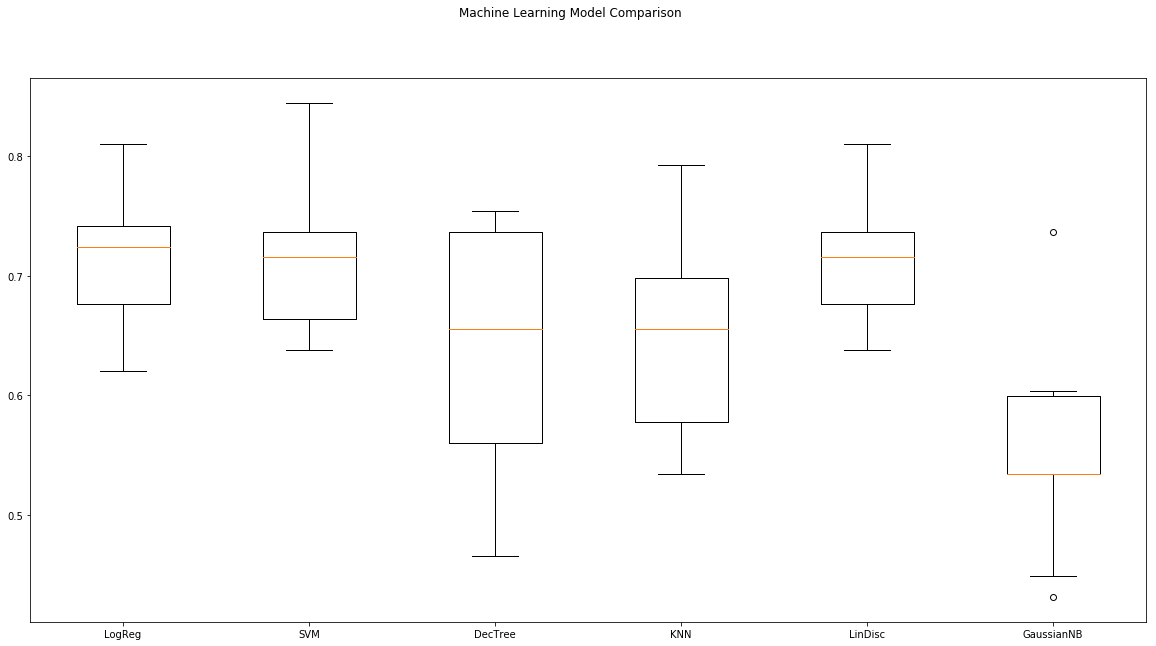

In [68]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()